Exploratory Data Analysis of the Lending Club Dataset

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install -q xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lc_data= pd.read_csv('/content/drive/MyDrive/lc_2016_2017.csv')
lc_data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.00,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.990000,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.00,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.090000,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.00,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.460000,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.00,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.800000,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.00,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.000000,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0
5,112230200,NaN,12000,12000,12000.0,36 months,9.44,384.06,B,B1,Teacher,10+ years,MORTGAGE,70000.00,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,184xx,PA,18.34,0,Aug-1997,0.0,35.0,83.0,14,1,15025.0,58.2,30,w,10528.73,10528.73,1904.570000,1904.57,1471.27,433.30,0.0,0.0,0.0,Dec-2017,384.06,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,211227.0,0.0,0.0,0.0,41.0,12438.0,40.0,2.0,3.0,5227.0,49.0,25800.0,0.0,0.0,2.0
6,112210041,NaN,6000,6000,6000.0,36 months,10.42,194.79,B,B3,Office Clerk,7 years,MORTGAGE,37107.19,Source Verified,Jun-2017,Current,n,NaN,medical,Medical expenses,773xx,TX,30.63,0,Mar-1992,0.0,70.0,71.0,10,1,9332.0,59.1,28,w,5274.05,5274.05,965.270000,965.27,725.95,239.32,0.0,0.0,0.0,Dec-2017,194.79,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,275.0,107517.0,0.0,0.0,1.0,19.0,19983.0,NaN,1.0,1.0,3990.0,59.0,15800.0,0.0,0.0,0.0
7

In [ ]:

lc_data=lc_data.drop(['id','member_id','desc','pymnt_plan','addr_state','funded_amnt','funded_amnt_inv',
'mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp_inv',
'total_pymnt_inv','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq',
'open_acc_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','il_util','open_rv_12m',
'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
'inq_last_12m','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code',
'recoveries','collection_recovery_fee','earliest_cr_line','delinq_2yrs','inq_last_6mths',
'out_prncp','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee'],axis=1)

In [ ]:
lc_data.head(15)
#lc_sample.info()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,tot_coll_amt,tot_cur_bal,total_bal_il
0,2300,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.00,Not Verified,Jun-2017,Current,credit_card,Credit card refinancing,148xx,21.61,4,0,3911.0,55.1,6,Individual,0.0,3911.0,0.0
1,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.00,Not Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,021xx,25.61,9,0,33752.0,105.8,26,Individual,0.0,234457.0,11078.0
2,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.00,Not Verified,Jun-2017,Current,home_improvement,Home improvement,018xx,8.88,11,0,12425.0,44.9,27,Individual,0.0,121311.0,0.0
3,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.00,Source Verified,Jun-2017,Current,car,Car financing,913xx,27.06,15,0,8769.0,18.7,19,Individual,0.0,62335.0,53566.0
4,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.00,Source Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,560xx,6.79,5,0,6866.0,88.0,24,Individual,0.0,15332.0,8466.0
5,12000,36 months,9.44,384.06,B,B1,Teacher,10+ years,MORTGAGE,70000.00,Not Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,184xx,18.34,14,1,15025.0,58.2,30,Individual,0.0,211227.0,12438.0
6,6000,36 months,10.42,194.79,B,B3,Office Clerk,7 years,MORTGAGE,37107.19,Source Verified,Jun-2017,Current,medical,Medical expenses,773xx,30.63,10,1,9332.0,59.1,28,Individual,275.0,107517.0,19983.0
7,12000,60 months,15.05,285.80,C,C4,PROGRAM DIRECTOR,6 years,RENT,69800.00,Not Verified,Jun-2017,Current,debt_consolidation,Debt consolidation,953xx,31.43,10,0,15227.0,79.7,12,Individual,0.0,51126.0,35899.0
8,11575,36 months,7.35,359.26,A,A4,Solutions Architect,6 years,OWN,153000.00,Not Verified,Jun-2017,Fully Paid,credit_card,Credit card refinancing,923xx,16.99,20,1,8550.0,22.7,46,Individual,0.0,442731.0,92315.0
9,20400,60 months,7.97,413.35,A,A5,asst plant manager,10+ years,MORTGAGE,110000.00,Not Verified,Jun-2017,Current,major_purchase,Major purchase,286xx,11.07,8,0,5294.0,8.1,21,Individual,0.0,101473.0,44985.0


In [ ]:
lc_data.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title              50970
emp_length             50363
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  23173
zip_code                   1
dti                      355
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               517
total_acc                  0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_bal_il              61
dtype: int64

In [ ]:
lc_data['emp_title']=lc_data['emp_title'].fillna("Unknown")
lc_data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length             50363
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                  23173
zip_code                   1
dti                      355
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               517
total_acc                  0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_bal_il              61
dtype: int64

In [ ]:
#Analyze Categorical Variables
categorical = lc_data.dtypes[lc_data.dtypes=="object"].index
#print(categorical)

lc_data[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,application_type
count,759338,759338,759338,759338,708975,759338,759338,759338,759338,759338,736165,759337,759338
unique,2,7,35,173023,11,5,3,21,7,13,13,919,2
top,36 months,C,C1,Unknown,10+ years,MORTGAGE,Source Verified,Mar-2016,Current,debt_consolidation,Debt consolidation,750xx,Individual
freq,561237,244903,56831,50970,257944,371579,298669,61992,565523,431530,417193,7986,725335


| Id | Variable | Description |
| --- | --- | --- |
| 0 | loan_amnt | The listed amount of the loan applied for by the borrower. |
| 1 | term | Length of the loan payment period (In months) |
| 2 | int_rate |  Interest Rate set on the loan by Lending Club based on Customer's credit check & other factors  |
| 3 | installment | Installment amount |
| 4 | grade | Loan grade assigned by Lending Club |
| 5 | annual_inc | Self-reported annual income |

In [ ]:
#Check if Empployee title is of any use
lc_data.emp_title.describe()

count      759338
unique     173023
top       Unknown
freq        50970
Name: emp_title, dtype: object

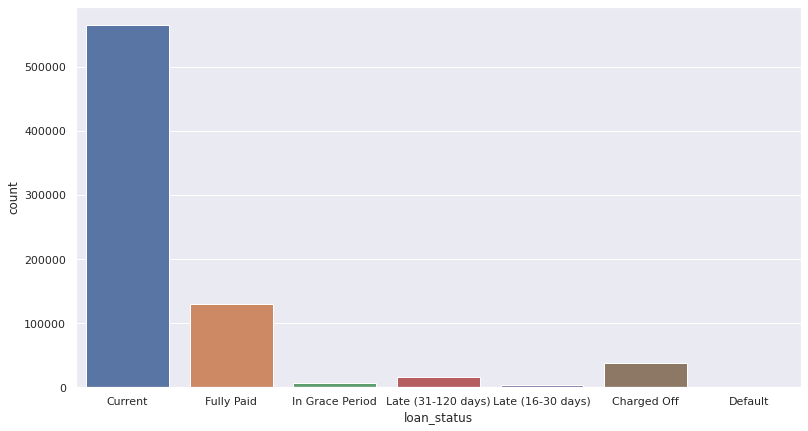

In [ ]:
#Our Target Variable is Loan_Status
#Let's take a count of this variable
sns.set(rc = {'figure.figsize':(13,7)})
sns.countplot(x ='loan_status', data = lc_data )

In [ ]:
lc_data.groupby(by='loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,37197.0,15690.263328,9174.795928,1000.0,8250.00,14250.0,21000.0,40000.0
Current,565523.0,14691.880260,9233.212431,1000.0,7500.00,12000.0,20000.0,40000.0
Default,36.0,14906.944444,9061.982224,1400.0,9081.25,13800.0,20000.0,40000.0
Fully Paid,130718.0,14266.351229,9085.739786,1000.0,7000.00,12000.0,20000.0,40000.0
In Grace Period,6634.0,16470.296955,9463.834696,1000.0,9075.00,15000.0,23100.0,40000.0
Late (16-30 days),3876.0,16011.880805,9427.000914,1000.0,8500.00,14962.5,21662.5,40000.0
Late (31-120 days),15354.0,15579.925427,9240.279424,1000.0,8000.00,14000.0,21000.0,40000.0


In [ ]:
#Let's merge Loan status into two Categories: 1) default 2) paid  
def merge_status(row):
    if row['loan_status'] == 'Current':
        return 'paid'
    elif row['loan_status'] =='Fully Paid':
        return 'paid' 
    elif row['loan_status'] =='In Grace Period':
        return 'paid' 
    else:
        return 'default'


In [ ]:
#Call the merge_status function
lc_data['loan_default'] = lc_data.apply(merge_status, axis=1) 

In [ ]:
lc_data.groupby(['loan_status','loan_default']).size().reset_index().rename(columns={0:'count'})

,loan_status,loan_default,count
0,Charged Off,default,37197
1,Current,paid,565523
2,Default,default,36
3,Fully Paid,paid,130718
4,In Grace Period,paid,6634
5,Late (16-30 days),default,3876
6,Late (31-120 days),default,15354


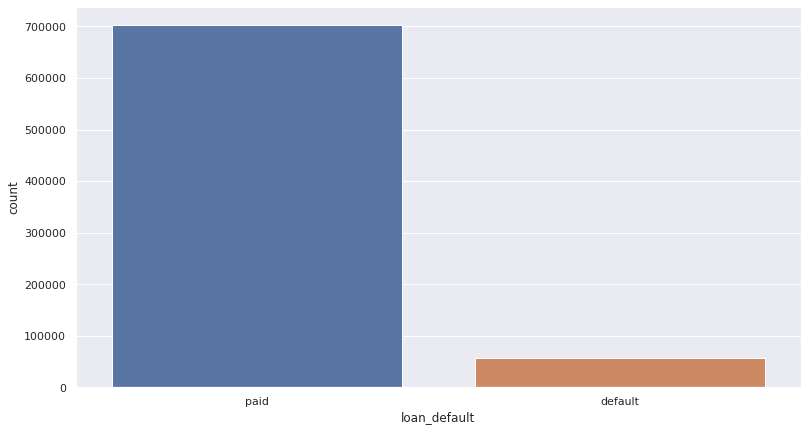

In [ ]:
#Our Target Variable is Loan_default
#Let's take a count of this variable
sns.countplot(x ='loan_default', data = lc_data )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


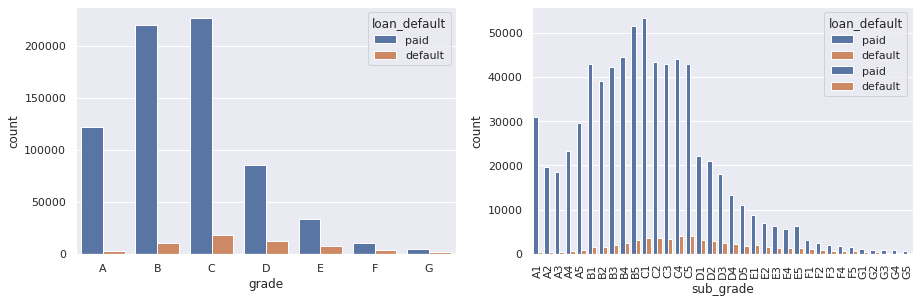

In [ ]:
#Visualize the Loan Default by different Loan Grade and Subgrade
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc_data.grade.unique().tolist())
sns.countplot(x='grade', data=lc_data, hue='loan_default', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#As expected lower quality grade tend to have lower number of loans sanctioned and higher number of default rates.
plt.subplot(2, 2, 2)
sub_grade = sorted(lc_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_data, hue='loan_default', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [ ]:
lc_mod1=lc_data.groupby(['sub_grade','loan_default']).count().reset_index(level='loan_default')


In [ ]:
lc22=lc_mod1[['loan_default','loan_status']]
lc22=lc22.astype({'loan_status': 'int'})

In [ ]:
percentage=[]
i=0
while i<=(lc22.shape[0]-1):
  percentage.append(lc22.iloc[i][1]/(lc22.iloc[i][1]+lc22.iloc[i+1][1]))
  i=i+2


In [ ]:
percentage

[0.01141945773524721,
 0.01747054677273185,
 0.02045358202628232,
 0.025688150035503947,
 0.02767939131575495,
 0.0326167698368036,
 0.038939967550027044,
 0.043992848899047275,
 0.05289302008271863,
 0.05883645552930836,
 0.06420791469444494,
 0.07664668112429307,
 0.07392356908179146,
 0.08154837633220013,
 0.08360561214683836,
 0.12144795657726692,
 0.11792175010517458,
 0.11865559279226771,
 0.14735837046467218,
 0.14501675368191383,
 0.17813233223838573,
 0.18148670900964478,
 0.17983367983367984,
 0.1900610287707062,
 0.17595424923527064,
 0.23544784984556902,
 0.25318066157760816,
 0.23385625684056913,
 0.2626172398392139,
 0.2661409561360276,
 0.22782258064516128,
 0.2682291666666667,
 0.21782178217821782,
 0.22567287784679088,
 0.19543973941368079]

In [ ]:
lc22=lc22.reset_index(level='sub_grade')

In [ ]:
subgrade=lc22['sub_grade'].unique()
final=pd.DataFrame(subgrade,percentage)
final=final.reset_index()
final['index']=final['index']*100

In [ ]:
final=final.sort_values(by='index',ascending=True)
final

,index,0
0,1.141946,A1
1,1.747055,A2
2,2.045358,A3
3,2.568815,A4
4,2.767939,A5
5,3.261677,B1
6,3.893997,B2
7,4.399285,B3
8,5.289302,B4
9,5.883646,B5


[Text(0, 0.5, 'Percentage of Defaulters'), Text(0.5, 0, 'Sub Grades')]

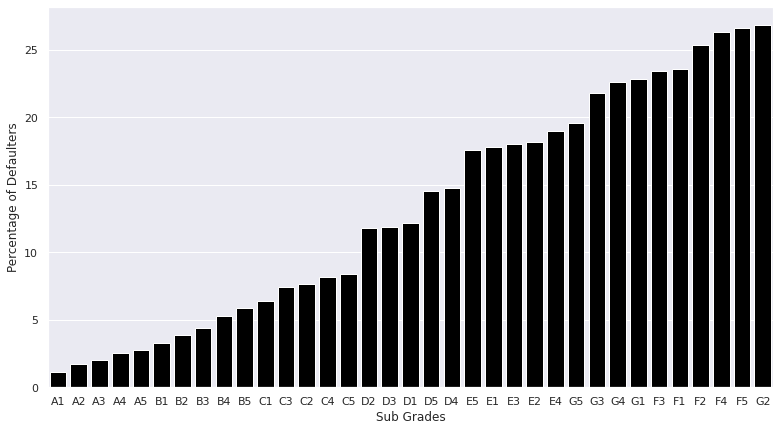

In [ ]:
#ax = sns.barplot(x="day", y="total_bill", data=tips)
g=sns.barplot(x=0, y='index',data=final, color='black')
g.set(xlabel='Sub Grades', ylabel='Percentage of Defaulters')

#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
lc_home=lc_data.groupby(['home_ownership','loan_default']).count()
lc_home=lc_home[['loan_status']]

In [ ]:
lc_home

loan_status
home_ownership loan_default             
ANY            default                27
               paid                  477
MORTGAGE       default             23331
               paid               348248
NONE           paid                    4
OWN            default              7030
               paid                83121
RENT           default             26075
               paid               271025

In [ ]:
lc_home=lc_home.drop(axis=0,labels=['ANY','NONE'])

In [ ]:
lc_home

loan_status
home_ownership loan_default             
MORTGAGE       default             23331
               paid               348248
OWN            default              7030
               paid                83121
RENT           default             26075
               paid               271025

In [ ]:
lc_home1=lc_home.reset_index(level='loan_default')

In [ ]:
lc_home1=lc_home1.astype({'loan_status': 'int'})
lc_home1

,loan_default,loan_status
home_ownership,,
MORTGAGE,default,23331
MORTGAGE,paid,348248
OWN,default,7030
OWN,paid,83121
RENT,default,26075
RENT,paid,271025


In [ ]:
lc_home1.iloc[0][1]

23331

In [ ]:
percentage1=[]
i=0
while i<=(lc_home1.shape[0]-1):
  percentage1.append((lc_home1.iloc[i][1]/(lc_home1.iloc[i][1]+lc_home1.iloc[i+1][1]))*100)
  i=i+2

In [ ]:
percentage1

[6.278880130470236, 7.7980277534359015, 8.776506226859643]

In [ ]:
home=['Mortage','Own','Rent']

[Text(0, 0.5, 'Percentage of Defaulters')]

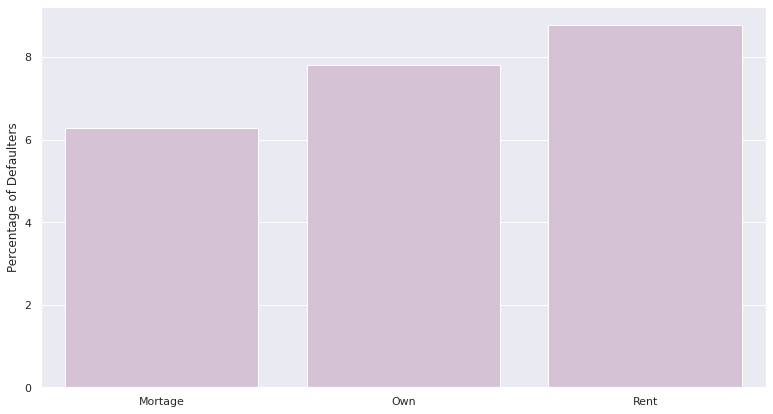

In [ ]:
g1=sns.barplot(x=home, y=percentage1, color='')
g1.set(ylabel='Percentage of Defaulters')

In [ ]:
g1=sns.barplot(x='loan_default', y='loan_status',data=mortgage, color='blue')
g1.set(ylabel='Count')

In [ ]:
lc_mod3=lc_data.groupby(['zip_code','loan_default']).count().reset_index(level='loan_default')

In [ ]:
lc_mod3=lc_mod3[['loan_default','loan_status']]


In [ ]:
lc_mod3.to_csv("zip1.csv")

<AxesSubplot:xlabel='loan_default', ylabel='annual_inc'>

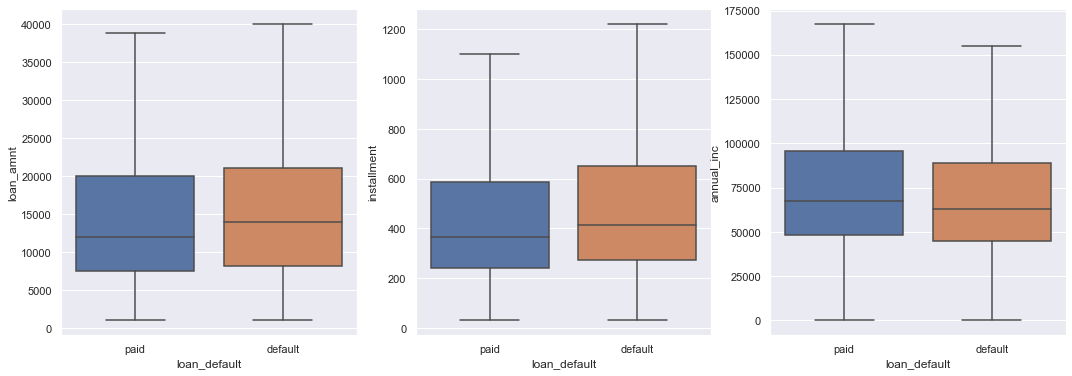

In [ ]:
#Visualize Relationships between different candidate variables and Target variable 
#Since the target variable is a Categorical variable we will use box plots to visualize to compare with numerical variables
sns.set(rc = {'figure.figsize':(18,6)})
fig, axs = plt.subplots(ncols=3)

#1. Loan Amount v/s Loan Default
sns.boxplot(x="loan_default", y="loan_amnt",showfliers = False,data=lc_data,ax=axs[0])

#2. Loan Installment v/s Loan Default
sns.boxplot(x="loan_default", y="installment",showfliers = False,data=lc_data, ax=axs[1])

#3. Annual Income v/s Loan Default
sns.boxplot(x="loan_default", y="annual_inc",showfliers = False,data=lc_data, ax=axs[2])

In [ ]:
#Remove unwanted Variables
#let's investigate and remove unwanted variables


In [ ]:
lc_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_default
0,112435993,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,...,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,paid
1,112290210,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,...,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,paid
2,112436985,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,...,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0,paid
3,112439006,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,...,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0,paid
4,112438929,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,...,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,6000,6000,6000.0,36 months,7.89,187.72,A,A5,Warehouse Clerk,...,NaN,NaN,NaN,NaN,NaN,21400.0,NaN,NaN,NaN,paid
759334,66055600,6000,6000,6000.0,36 months,9.17,191.28,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN,paid
759335,66141895,14400,14400,14400.0,60 months,13.18,328.98,C,C3,Meatcutter,...,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN,default
759336,65673209,34050,34050,34050.0,36 months,15.41,1187.21,D,D1,Supervisor,...,NaN,NaN,NaN,NaN,NaN,47900.0,NaN,NaN,NaN,paid


In [ ]:
!pip install -q hvplot

<AxesSubplot:>

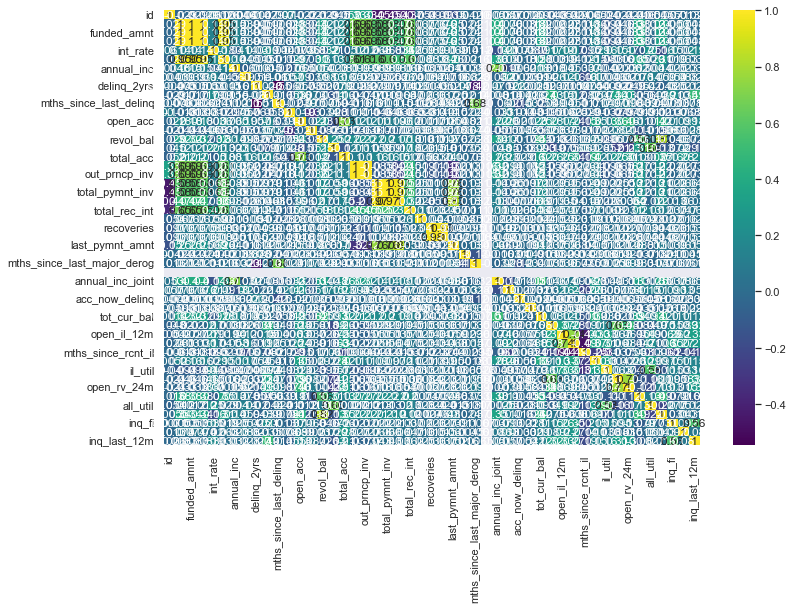

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(lc_data.corr(), annot=True, cmap='viridis')

In [ ]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   loan_amnt                    759338 non-null  int64  
 2   funded_amnt                  759338 non-null  int64  
 3   funded_amnt_inv              759338 non-null  float64
 4   term                         759338 non-null  object 
 5   int_rate                     759338 non-null  float64
 6   installment                  759338 non-null  float64
 7   grade                        759338 non-null  object 
 8   sub_grade                    759338 non-null  object 
 9   emp_title                    708368 non-null  object 
 10  emp_length                   708975 non-null  object 
 11  home_ownership               759338 non-null  object 
 12  annual_inc                   759338 non-null  float64
 13 

In [ ]:
lc_data['emp_title'].value_counts()[:20]

Teacher               15479
Manager               14059
Owner                  9797
Supervisor             6937
Registered Nurse       6406
Driver                 6399
RN                     5862
Sales                  5608
Project Manager        4308
Director               3892
General Manager        3813
Office Manager         3742
owner                  3458
President              3376
Engineer               2898
Vice President         2594
Operations Manager     2531
manager                2400
teacher                2373
Nurse                  2284
Name: emp_title, dtype: int64

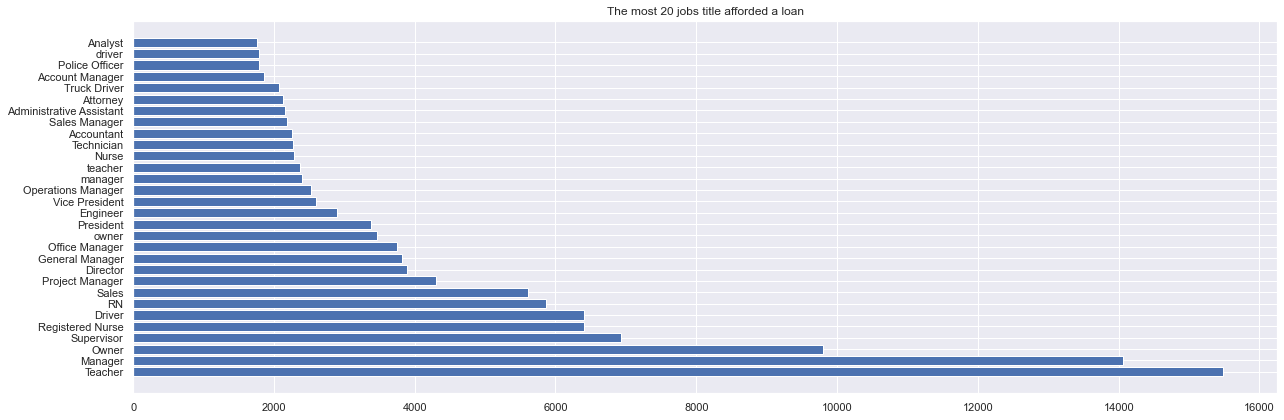

In [ ]:

plt.barh(lc_data.emp_title.value_counts()[:30].index, lc_data.emp_title.value_counts()[:30])
plt.title("The most 20 jobs title afforded a loan")
plt.tight_layout()

In [ ]:
#Missing Values Detection
for column in lc_data.columns:
    if lc_data[column].isna().sum() != 0:
        missing = lc_data[column].isna().sum()
        portion = (missing / lc_data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '50970' ==> '6.712%'
'emp_length': number of missing values '50363' ==> '6.632%'
'desc': number of missing values '759321' ==> '99.998%'
'title': number of missing values '23173' ==> '3.052%'
'zip_code': number of missing values '1' ==> '0.000%'
'dti': number of missing values '355' ==> '0.047%'
'inq_last_6mths': number of missing values '1' ==> '0.000%'
'mths_since_last_delinq': number of missing values '362705' ==> '47.766%'
'mths_since_last_record': number of missing values '618159' ==> '81.408%'
'revol_util': number of missing values '517' ==> '0.068%'
'last_pymnt_d': number of missing values '948' ==> '0.125%'
'next_pymnt_d': number of missing values '167915' ==> '22.113%'
'last_credit_pull_d': number of missing values '18' ==> '0.002%'
'mths_since_last_major_derog': number of missing values '544233' ==> '71.672%'
'annual_inc_joint': number of missing values '725335' ==> '95.522%'
'dti_joint': number of missing values '725337' ==> '95.522%'
'v

In [ ]:
lc_data.desc.notnull().sum()

17

KeyError: "['desc' 'pymnt_plan' 'addr_state' 'funded_amnt' 'funded_amnt_inv'\n 'mths_since_last_delinq' 'mths_since_last_record' 'initial_list_status'\n 'out_prncp_inv' 'total_pymnt_inv'] not found in axis"

In [ ]:
lc_data.pymnt_plan.value_counts()


n    758794
y       544
Name: pymnt_plan, dtype: int64

In [ ]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   loan_amnt                    759338 non-null  int64  
 2   term                         759338 non-null  object 
 3   int_rate                     759338 non-null  float64
 4   installment                  759338 non-null  float64
 5   grade                        759338 non-null  object 
 6   sub_grade                    759338 non-null  object 
 7   emp_title                    708368 non-null  object 
 8   emp_length                   708975 non-null  object 
 9   home_ownership               759338 non-null  object 
 10  annual_inc                   759338 non-null  float64
 11  verification_status          759338 non-null  object 
 12  issue_d                      759338 non-null  object 
 13 